In [2]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import os as os
import pandas as pd

In [3]:
#settings for plots

#tableau for plots
plt.style.use('tableau-colorblind10')

plt.rcParams["figure.autolayout"] = True

plt.rcParams['font.size'] = 16        # Default font size for text
plt.rcParams['axes.titlesize'] = 16   # Font size for axes titles
plt.rcParams['axes.labelsize'] = 16   # Font size for x and y labels
plt.rcParams['xtick.labelsize'] = 16  # Font size for x tick labels
plt.rcParams['ytick.labelsize'] = 16  # Font size for y tick labels

## Processing of simulations

In [ ]:
cartella ='placeholder/'
SIM = False

In [ ]:
if SIM ==True:
    fold0 = 'path_to_sim/'
else:
    fold0 = 'path_to_stat/'

In [ ]:
#Parameters lists
#Parameters lists
S_list = [200]
mu= -3
sigma_list = [2.5, 2.7, 3.1, 3.3, 2.9, 2.3, 3.5, 3.7, 2.1]
sigma_list.sort()
gamma_list = [-0.5]
K = 0.1

N_cut = 38_000

In [ ]:
col = ['S', 'mu', 'sigma', 'gamma', 'K', 'h', 'd']
df = pd.DataFrame(columns = col)

for S in S_list:
    fold1 = 'S{}/'.format(S)

    
    for gamma in gamma_list:
        for sigma in sigma_list:

            fold2 = 'mu{}_sigma{}_gamma{}_K{}/'.format(mu, sigma, gamma, K)
            #fold2 = 'mu{}_sigma{}/'.format(mu, sigma)
            
            files = os.listdir(fold0+fold1+fold2)
            #files = os.listdir(fold0)
            
            h = 0
            d = 0

            print('S:', S, 'sigma', sigma, 'gamma:', gamma)

            samples = []
    
            for file in files:
            
                path = fold0 +fold1 +fold2 +file
                #path = fold0 +file
            
                data = np.load(path)
                if(SIM == True):
                    run1 = data['run1']
                    run2 = data['run2']
                    alpha = data['alpha']
                    stat1 = run1[:, N_cut:]
                    stat2 = run2[:, N_cut:]
                else:
                    stat1 = data['stat1']
                    stat2 = data['stat2']

                samples.append(stat1[:,-1])
                samples.append(stat2[:,-1])
                
                #compute h
                temp1 = np.mean(stat1**2, axis = 1)
                temp2 = np.mean(stat1, axis = 1)**2
                h_temp = np.mean(temp1-temp2)/np.mean(temp2)
                h = h + h_temp/len(files) 
                
                #compute d
                temp3 = np.mean(np.mean((stat1-stat2)**2, axis = 0))
                temp4 = np.mean(np.mean( stat1 ,axis = 0)**2)
                d_temp = temp3/temp4
                d = d + d_temp/len(files)
                
            #save in df
            df.loc[len(df.index)] = [S, mu, sigma, gamma, K, h, d] 

S: 200 sigma 2.1 gamma: -0.5
S: 200 sigma 2.3 gamma: -0.5
S: 200 sigma 2.5 gamma: -0.5
S: 200 sigma 2.7 gamma: -0.5
S: 200 sigma 2.9 gamma: -0.5
S: 200 sigma 3.1 gamma: -0.5
S: 200 sigma 3.3 gamma: -0.5
S: 200 sigma 3.5 gamma: -0.5
S: 200 sigma 3.7 gamma: -0.5


## Plot h and d

In [12]:
path_to_df = 'placeholder/'
df = pd.read_csv(path_to_df).reset_index(drop=True)

In [14]:
S_list = [50, 100, 200, 400]

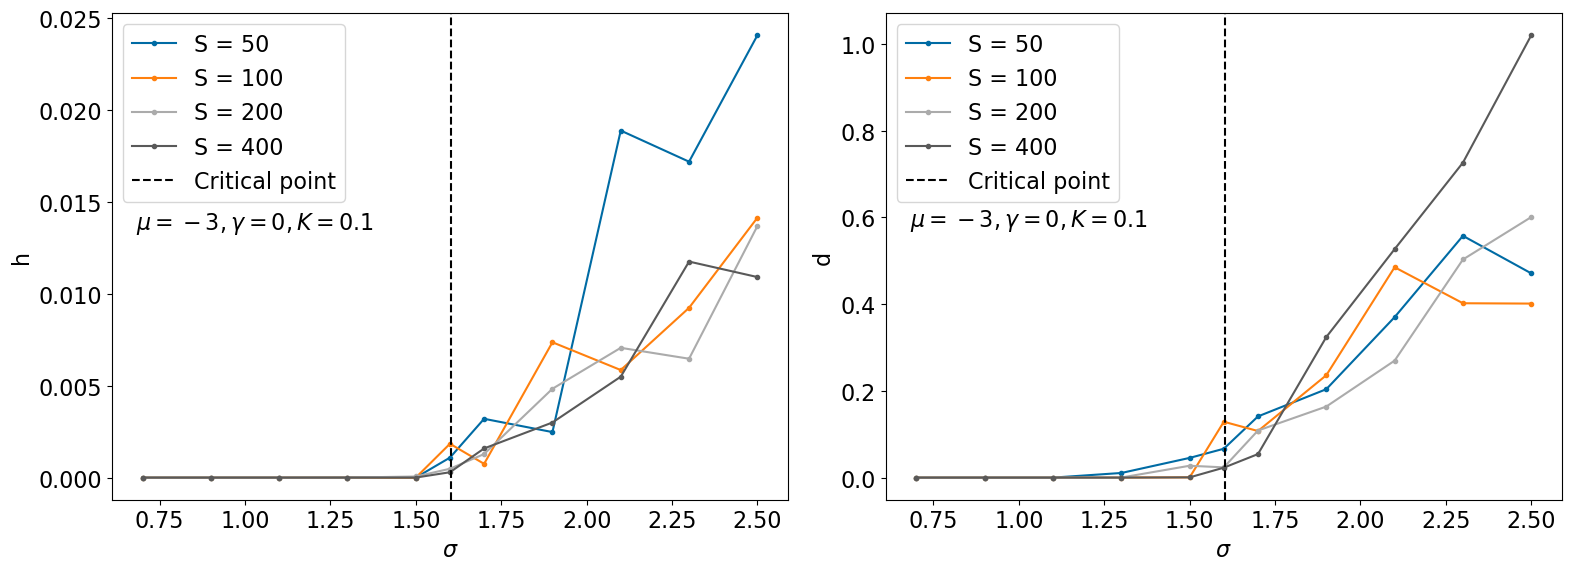

In [29]:
fig, ax = plt.subplots(1,2, figsize=(16, 6))
#plotting
for S in S_list:

    ax[0].plot(df['sigma'][df['S']==S], df['h'][df['S']==S], '.-', label = 'S = {}'.format(S))
    ax[0].set_xlabel(r'$\sigma$')
    ax[0].set_ylabel('h')

    ax[1].plot(df['sigma'][df['S']==S], df['d'][df['S']==S], '.-', label = 'S = {}'.format(S))
    ax[1].set_xlabel(r'$\sigma$')
    ax[1].set_ylabel('d')

ax[0].axvline(x=1.6041052, linestyle = '--', color = 'black', label = 'Critical point' )
ax[1].axvline(x=1.6041052, linestyle = '--', color = 'black', label = 'Critical point' )

ax[1].legend()
ax[0].legend()

ax[0].text(0.68, 0.0135, r'$\mu = -3, \gamma = 0, K = 0.1$')
ax[1].text(0.68, 0.58, r'$\mu = -3, \gamma = 0, K = 0.1$')

plt.savefig('results/h_d_simga_mu-3_gamma0_K0.1.png', pad_inches = 0.1, bbox_inches = 'tight')